In [24]:
key='d14b3bc6bc5d2cf1e77e9d080579546d07de6140'
import pandas_datareader as pdr

In [25]:
df=pdr.get_data_tiingo("AAPL",api_key=key)
df.to_csv("data.csv")

<ipython-input-25-53e5decc5541>:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df=pdr.get_data_tiingo("AAPL",api_key=key)


In [26]:
import pandas as pd
data=pd.read_csv("data.csv")
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-08-03 00:00:00+00:00,207.99,208.74,205.48,207.03,33447396,49.688539,49.867713,49.088903,49.459196,133789584,0.0,1.0
1,AAPL,2018-08-06 00:00:00+00:00,209.07,209.25,207.07,208.00,25425387,49.946550,49.989551,49.468752,49.690928,101701548,0.0,1.0
2,AAPL,2018-08-07 00:00:00+00:00,207.11,209.50,206.76,209.32,25587387,49.478308,50.049276,49.394694,50.006274,102349548,0.0,1.0
3,AAPL,2018-08-08 00:00:00+00:00,207.25,207.81,204.52,206.05,22525487,49.511754,49.645537,48.859561,49.225076,90101948,0.0,1.0
4,AAPL,2018-08-09 00:00:00+00:00,208.88,209.78,207.20,207.28,23492626,49.901159,50.116168,49.499809,49.518921,93970504,0.0,1.0


In [27]:
df1=data["close"]
df1

0       207.990
1       209.070
2       207.110
3       207.250
4       208.880
         ...   
1251    194.500
1252    193.220
1253    195.830
1254    196.450
1255    195.605
Name: close, Length: 1256, dtype: float64

In [28]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler=MinMaxScaler(feature_range=(0, 1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1.shape)

(1256, 1)


In [29]:
df1[:5]

array([[0.25335003],
       [0.2560551 ],
       [0.2511459 ],
       [0.25149656],
       [0.25557921]])

In [30]:
train_length=int(len(df1)*0.70)
train_data=df1[:train_length]
test_data=df1[train_length : len(df1)]

In [35]:
def create_dataset(dataset,timestep):
  dataX,dataY=[],[]
  for i in range(len(dataset)-timestep-1):
    a=dataset[i:(i+timestep),0]
    dataX.append(a)
    dataY.append(dataset[i+timestep])
  return np.array(dataX),np.array(dataY)


In [36]:
timestep=100
X_train,y_train=create_dataset(train_data,timestep)
X_test,y_test=create_dataset(test_data,timestep)

In [38]:
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [39]:
X_train.shape

(778, 100, 1)

In [43]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
model = Sequential()
model.add(LSTM(64, return_sequences=True,input_shape=(100, 1)))  # returns a sequence of vectors of dimension 32
model.add(LSTM(64, return_sequences=True))  # returns a sequence of vectors of dimension 32
model.add(LSTM(64))  # return a single vector of dimension 32
model.add(Dense(1))

In [44]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [45]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
25/25 [==============================] - 11s 155ms/step - loss: 0.0227
Epoch 2/50
25/25 [==============================] - 5s 199ms/step - loss: 0.0098
Epoch 3/50
25/25 [==============================] - 4s 158ms/step - loss: 0.0090
Epoch 4/50
25/25 [==============================] - 4s 156ms/step - loss: 0.0064
Epoch 5/50
25/25 [==============================] - 5s 201ms/step - loss: 0.0055
Epoch 6/50
25/25 [==============================] - 4s 155ms/step - loss: 0.0046
Epoch 7/50
25/25 [==============================] - 4s 156ms/step - loss: 0.0044
Epoch 8/50
25/25 [==============================] - 5s 204ms/step - loss: 0.0035
Epoch 9/50
25/25 [==============================] - 4s 154ms/step - loss: 0.0044
Epoch 10/50
25/25 [==============================] - 4s 157ms/step - loss: 0.0031
Epoch 11/50
25/25 [==============================] - 6s 253ms/step - loss: 0.0033
Epoch 12/50
25/25 [==============================] - 4s 154ms/step - loss: 0.0029
Epoch 13/50
25/25 [=====

In [46]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

9/9 [==============================] - 0s 46ms/step


In [47]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

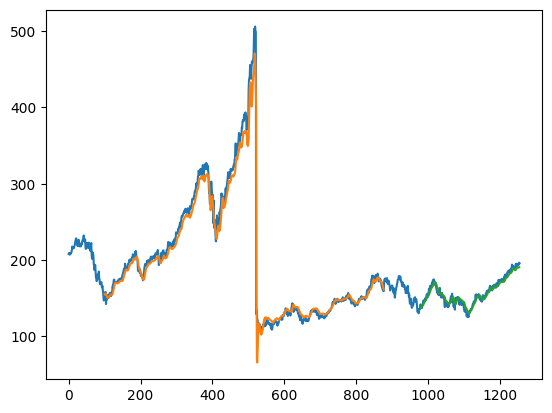

In [48]:


### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

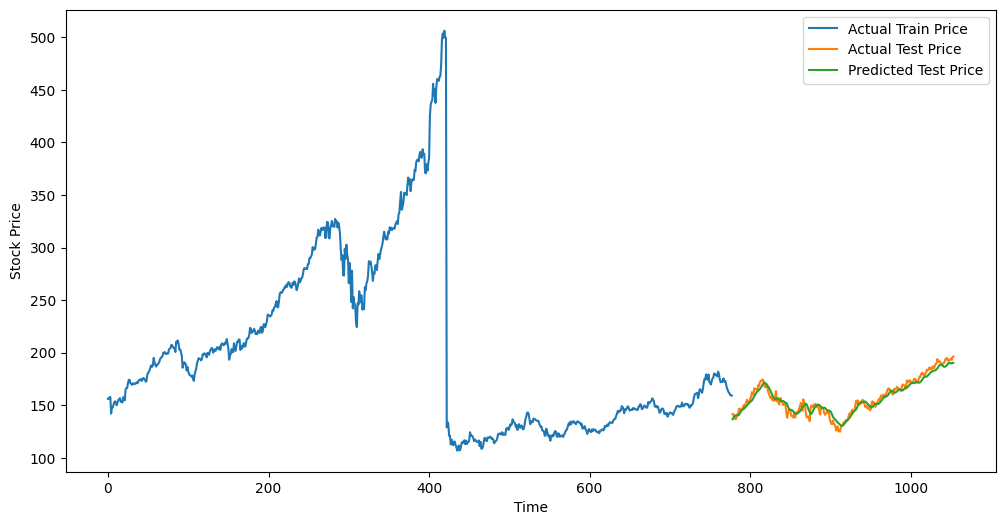

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train)), scaler.inverse_transform(y_train.reshape(-1, 1)), label='Actual Train Price')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), scaler.inverse_transform(y_test.reshape(-1, 1)), label='Actual Test Price')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), test_predict, label='Predicted Test Price')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

## Same Problem but different dataset and different approach

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.models import load_model
from keras.layers import LSTM
from keras.utils.vis_utils import plot_model

In [15]:
df=pd.read_csv("MSFT.csv",index_col="Date",parse_dates=True,infer_datetime_format=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061434,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063628,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064725,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063079,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061982,47894400
...,...,...,...,...,...,...
2022-03-18,295.369995,301.000000,292.730011,300.429993,300.429993,43317000
2022-03-21,298.890015,300.140015,294.899994,299.160004,299.160004,28351200
2022-03-22,299.799988,305.000000,298.769989,304.059998,304.059998,27599700


In [18]:
#The Data is already scaled
print("Dataframe Shape: ", df. shape)
print("Null Value Present: ", df.isnull().values.any())

Dataframe Shape:  (9083, 6)
Null Value Present:  False


<Axes: xlabel='Date'>

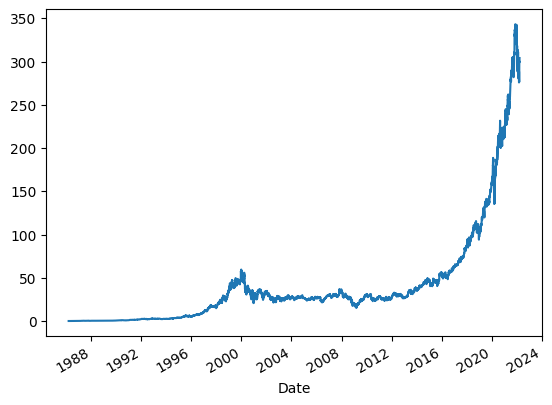

In [19]:
df['Close'].plot()

In [21]:
target=df["Close"]
features=df[['High','Low','Open',"Volume"]]
features

,High,Low,Open,Volume
Date,,,,
1986-03-13,0.101563,0.088542,0.088542,1031788800
1986-03-14,0.102431,0.097222,0.097222,308160000
1986-03-17,0.103299,0.100694,0.100694,133171200
1986-03-18,0.103299,0.098958,0.102431,67766400
1986-03-19,0.100694,0.097222,0.099826,47894400
...,...,...,...,...
2022-03-18,301.000000,292.730011,295.369995,43317000
2022-03-21,300.140015,294.899994,298.890015,28351200
2022-03-22,305.000000,298.769989,299.799988,27599700


In [22]:
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(features)
feature_transform= pd.DataFrame(columns=features.columns, data=feature_transform, index=df.index)
feature_transform.head()

,High,Low,Open,Volume
Date,,,,
1986-03-13,0.000027,0.000000,0.000000,1.000000
1986-03-14,0.000030,0.000025,0.000025,0.297096
1986-03-17,0.000032,0.000036,0.000035,0.127119
1986-03-18,0.000032,0.000030,0.000040,0.063588
1986-03-19,0.000025,0.000025,0.000033,0.044285


In [23]:
timesplit= TimeSeriesSplit(n_splits=20)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = target[:len(train_index)].values.ravel(), target[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [24]:
X_train

,High,Low,Open,Volume
Date,,,,
1986-03-13,0.000027,0.000000,0.000000,1.000000
1986-03-14,0.000030,0.000025,0.000025,0.297096
1986-03-17,0.000032,0.000036,0.000035,0.127119
1986-03-18,0.000032,0.000030,0.000040,0.063588
1986-03-19,0.000025,0.000025,0.000033,0.044285
...,...,...,...,...
2020-07-01,0.590020,0.589520,0.589355,0.028905
2020-07-02,0.594797,0.598961,0.596728,0.026238
2020-07-06,0.603694,0.607993,0.605871,0.028746


In [25]:
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

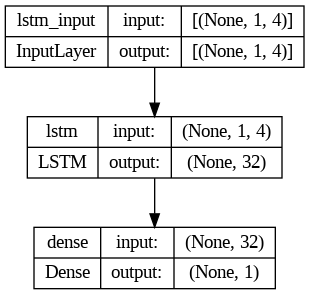

In [26]:
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

In [27]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
1082/1082 [==============================] - 7s 4ms/step - loss: 367.7144
Epoch 2/100
1082/1082 [==============================] - 5s 4ms/step - loss: 374.7755
Epoch 3/100
1082/1082 [==============================] - 3s 3ms/step - loss: 279.5764
Epoch 4/100
1082/1082 [==============================] - 3s 3ms/step - loss: 138.0462
Epoch 5/100
1082/1082 [==============================] - 3s 3ms/step - loss: 60.3434
Epoch 6/100
1082/1082 [==============================] - 4s 4ms/step - loss: 21.6201
Epoch 7/100
1082/1082 [==============================] - 3s 3ms/step - loss: 6.3493
Epoch 8/100
1082/1082 [==============================] - 3s 3ms/step - loss: 2.3050
Epoch 9/100
1082/1082 [==============================] - 3s 3ms/step - loss: 1.2886
Epoch 10/100
1082/1082 [==============================] - 4s 4ms/step - loss: 0.9192
Epoch 11/100
1082/1082 [==============================] - 4s 4ms/step - loss: 0.7848
Epoch 12/100
1082/1082 [==============================] - 3s 3ms

In [28]:
y_pred= lstm.predict(X_test)


14/14 [==============================] - 0s 2ms/step


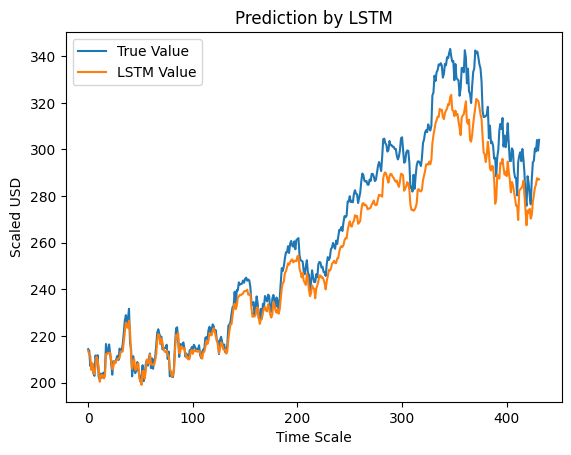

In [29]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title('Prediction by LSTM')
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()